In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten, Activation, LayerNormalization, Softmax
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from keras import models

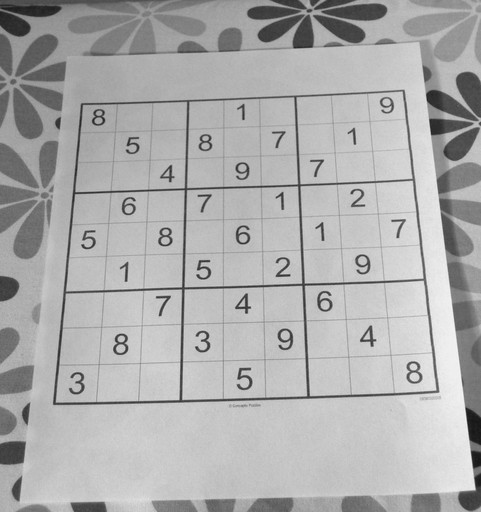

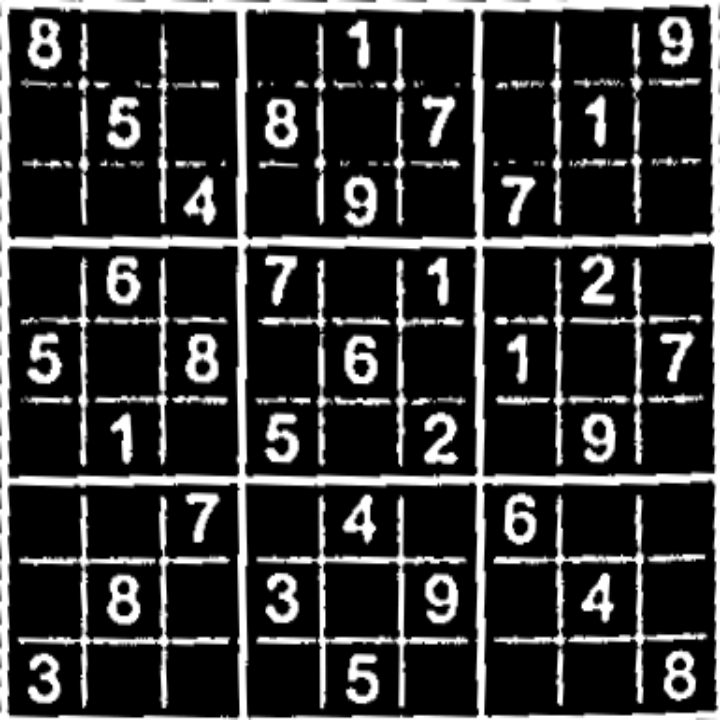

In [51]:
url= "/content/sud3.jpeg"
img = cv2.imread(url, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
img=cv2.GaussianBlur(img.copy(),(9,9),0)
img=cv2.adaptiveThreshold(img.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img = cv2.bitwise_not(img, img)
kernel = np.asarray([[0,1,0],[1,1,1],[0,1,0]],np.uint8)
#img=cv2.dilate(img.copy(),kernel)
contours,heirarchy=cv2.findContours(img,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours_sorted= sorted(contours, key=cv2.contourArea,reverse=True)
corners=cv2.approxPolyDP(contours_sorted[2],0.015*cv2.arcLength(contours_sorted[2],True),True)
for c in contours_sorted:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.015 * peri, True)
    if len(approx) == 4:
        corners=approx
        break
corners=[(i[0][0],i[0][1]) for i in corners]

t_r, t_l, b_l, b_r = corners[0], corners[1], corners[2], corners[3]

width=int(max(np.sqrt(((b_r[0] - b_l[0]) ** 2) + ((b_r[1] - b_l[1]) ** 2)),
          np.sqrt(((t_r[0] - t_l[0]) ** 2) + ((t_r[1] - t_l[1]) ** 2))))
height=int(max(np.sqrt(((t_r[0] - b_r[0]) ** 2) + ((t_r[1] - b_r[1]) ** 2)),
          np.sqrt(((t_l[0] - b_l[0]) ** 2) + ((t_l[1] - b_l[1]) ** 2))))
dimensions = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype="float32")
new_corners = np.array([t_l,t_r,b_r,b_l], dtype="float32")

grid = cv2.getPerspectiveTransform(new_corners, dimensions)
img = cv2.warpPerspective(img.copy(), grid, (width, height))
sud = cv2.resize(img,(720,720))
cv2_imshow(sud)

In [79]:
blocks=[]
printed=[]
arr=[]
for i in range(0,720,80):
  arr.append(i)
for i in arr:
  for j in arr:
    img=sud[i+5:i+75,j+5:j+75]
    if np.sum((img<=127))>=4400:
      printed.append(-1)
    else:
      printed.append(1)
    blocks.append(cv2.resize(img,(28,28)).reshape(28,28,1))
for i in range(len(blocks)):
  print(printed[i])
  cv2_imshow(blocks[i])
blocks=np.array(blocks)
blocks=blocks/255.0

1


-1


-1


1


1


-1


-1


-1


1


-1


1


-1


1


-1


1


-1


1


-1


-1


-1


1


-1


1


-1


1


-1


-1


-1


1


-1


1


-1


1


-1


1


-1


1


-1


1


-1


1


-1


-1


-1


1


-1


1


-1


1


-1


1


-1


1


-1


-1


-1


1


-1


1


-1


1


-1


-1


-1


1


-1


1


-1


1


-1


1


-1


1


-1


-1


-1


1


-1


-1


-1


1


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),use_bias=True,strides=(1,1), padding='valid',input_shape=X_train[0].shape,activation='relu' ))
model.add(LayerNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1),use_bias=True, padding='same',activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3),strides=(1,1),use_bias=True, padding='same',activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [7]:
opt = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
layer_normalization (LayerNo (None, 26, 26, 32)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0

In [8]:
epochs = 2
history = model.fit(
  X_train,y_train,
  batch_size=512,
  epochs=epochs,
)

Epoch 1/2
118/118 [==============================] - 447s 4s/step - loss: 0.2972 - accuracy: 0.9247
Epoch 2/2
118/118 [==============================] - 446s 4s/step - loss: 0.0406 - accuracy: 0.9878


In [9]:
y_pred_value=model.predict(X_test)
y_pred = np.argmax(y_pred_value,axis=-1)
print(accuracy_score(y_test,y_pred))

0.9847


In [84]:
sudoku=[]
y_pred_sud = np.argmax(model.predict(blocks),axis=-1)
for j in range(81):
  if printed[j]>0:
    sudoku.append(y_pred_sud[j])
  else:
    sudoku.append(-1)
sudoku_final=[]
i=0
for j in range(0,81,9):
  sudoku_final.append(sudoku[j:j+9])
sudoku_final

[[8, -1, -1, 7, 1, -1, -1, -1, 9],
 [-1, 5, -1, 8, -1, 7, -1, 1, -1],
 [-1, -1, 4, -1, 9, -1, 7, -1, -1],
 [-1, 5, -1, 7, -1, 1, -1, 2, -1],
 [5, -1, 8, -1, 5, -1, -1, -1, 2],
 [-1, 1, -1, 5, -1, 2, -1, 9, -1],
 [-1, -1, 1, -1, 4, -1, 5, -1, -1],
 [-1, 8, -1, 3, -1, 9, -1, 4, -1],
 [3, -1, -1, -1, 5, -1, -1, -1, 0]]

In [85]:
sudoku_final[0][3]=-1
sudoku_final[3][1]=6
sudoku_final[4][4]=6
sudoku_final[4][6]=1
sudoku_final[4][8]=7
sudoku_final[6][2]=7
sudoku_final[6][6]=6
sudoku_final[8][8]=8 #clearing disrepancies due to non 100 percent accuracy
def is_valid(sud, num, pos):
    for i in range(len(sud[0])):
        if sud[pos[0]][i] == num and pos[1] != i:
            return False
    for i in range(len(sud)):
        if sud[i][pos[1]] == num and pos[0] != i:
            return False
    box_x = pos[1] // 3
    box_y = pos[0] // 3
    for i in range(box_y*3, box_y*3 + 3):
        for j in range(box_x * 3, box_x*3 + 3):
            if sud[i][j] == num and (i,j) != pos:
                return False
    return True

def empty(sud):
  for i in range(len(sud)):
      for j in range(len(sud[0])):
          if sud[i][j] <= 0:
              return (i, j) 
  return None

def solve(sud):
    emp = empty(sud)
    if not emp:
        return True
    else:
        row, col = emp
    for i in range(1,10):
        if is_valid(sud, i, (row, col)):
            sud[row][col] = i
            if solve(sud):
                return True
            sud[row][col] = -1
    return False


solve(sudoku_final)


True

In [86]:
sudoku_final

[[8, 7, 2, 4, 1, 3, 5, 6, 9],
 [9, 5, 6, 8, 2, 7, 3, 1, 4],
 [1, 3, 4, 6, 9, 5, 7, 8, 2],
 [4, 6, 9, 7, 3, 1, 8, 2, 5],
 [5, 2, 8, 9, 6, 4, 1, 3, 7],
 [7, 1, 3, 5, 8, 2, 4, 9, 6],
 [2, 9, 7, 1, 4, 8, 6, 5, 3],
 [6, 8, 5, 3, 7, 9, 2, 4, 1],
 [3, 4, 1, 2, 5, 6, 9, 7, 8]]